# Imports 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json 

In [ ]:
os.chdir('/home/anonuser/thesis/')

In [6]:
from utils.analysis import get_attr, get_positions, \
    pos_v_rest, query_wandb_runs, get_wandb_id, latex_table_maker, \
    make_runs_table, filter_table, get_table_highlighted_tokens,\
    make_constant_positions, plot_attr_samples, plot_distributions, \
    get_table_topk, top_v_rest

# Sample Top Tokens 


## Sweep Tables 

In [1]:
standard_filter = {'lr': {'$eq': 1e-5}, 
                    'optimizer': {'$eq': 'adamw'}, 
                    'lmbd': {'$eq': 0}, 
                    'scheduler_type': {'$eq':'linear'},
                    'approach': {'$eq':'topk'}, 
                    'expl_method': {'$eq':'GAE'}} 
metrics = ['eval/accuracy', 'eval/expl_topk_loss', 'eval/rank_loss']

mappings = {
    'lmbd': r'$\lambda$',
    'eval/accuracy': 'Accuracy',
    'loss_fn': 'Attack $\\mathcal{L}$',
    'eval/expl_topk_loss': 'Top k Loss',
    'eval/rank_loss': 'Rank Loss',
    'rank_topk': 'Rank Loss',
    'topk': 'Top k Loss',
    
}

### Bert SST 

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_bert_sst_topk', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='sst2',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.0,-,0.825688,0.046198,0.514897
1,0.1,rank_topk,0.822248,0.044125,0.512842
2,0.1,topk,0.825688,0.044171,0.513030
3,1.0,rank_topk,0.815367,0.027487,0.496778
4,1.0,topk,0.813073,0.025785,0.496799
5,10.0,rank_topk,0.818807,0.000427,0.473492
6,10.0,topk,0.819954,0.000283,0.475252


In [8]:
latex_str = latex_table_maker(filtered_table, 'results/tables/topk_sst_bert.tex', mappings)
print(latex_str)

\begin{table}[h!]
\centering
{\small
\begin{tabular}{rlrrr}
\toprule
$\lambda$ & Attack $\mathcal{L}$ & Accuracy & Top k Loss & Rank Loss \\
\midrule
0 & - & 0.826 & 0.046 & 0.515 \\
0.1 & Rank Loss & 0.822 & 0.044 & 0.513 \\
0.1 & Top k Loss & 0.826 & 0.044 & 0.513 \\
1 & Rank Loss & 0.815 & 0.027 & 0.497 \\
1 & Top k Loss & 0.813 & 0.026 & 0.497 \\
10 & Rank Loss & 0.819 & 0.000 & 0.473 \\
10 & Top k Loss & 0.820 & 0.000 & 0.475 \\
\bottomrule
\end{tabular}
\caption{ENTER CAPTION}
\label{tab:TableLabel}
}
\end{table}


### Bert IMDb

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_bert_imdb_topk', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='imdb',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.87184,0.030177,0.526029
1,0.1,topk,0.87184,0.030156,0.526028
2,1.0,rank_topk,0.87168,0.022506,0.518185
3,1.0,topk,0.87176,0.022711,0.518583
4,10.0,rank_topk,0.87336,0.003314,0.499884
5,10.0,topk,0.87264,0.002846,0.499588


### Albert SST 

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_albert_sst_topk', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='sst2',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.0,-,0.861239,0.006233,0.483660
1,0.1,rank_topk,0.852064,0.006698,0.484080
2,0.1,topk,0.857798,0.005578,0.483577
3,1.0,rank_topk,0.864679,0.005588,0.483234
4,1.0,topk,0.864679,0.005523,0.483091
5,10.0,rank_topk,0.864679,0.004333,0.482011
6,10.0,topk,0.869266,0.003999,0.481996


### Albert IMDb

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_albert_imdb_topk', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='imdb',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.90520,0.000295,0.498289
1,0.1,topk,0.90504,0.000202,0.498236
2,1.0,rank_topk,0.90512,0.000268,0.498258
3,1.0,topk,0.90256,0.000194,0.498248
4,10.0,rank_topk,0.89848,0.000178,0.498208
5,10.0,topk,0.90112,0.000213,0.498225


## Additional Tables 

In [ ]:
vol_path = '/vol/csedu-nobackup/project/anonuser/results_attr/results/'

### Bert SST 

In [11]:
attr_file_topk=vol_path + 'results_val_bert_sst2s04rls18.json'
attr_file_rank=vol_path + 'results_val_bert_sst27i2j3643.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_sst2.json'

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.491884,0.031033,-0.522917,33.690894
rank,-0.244676,0.016418,-0.261094,45.320159
ref,3.413346,-0.171414,3.584760,100.000000


In [15]:
attr_file_topk=vol_path + 'results_val_bert_sst2s04rls18_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_sst27i2j3643_LRP.json' 
attr_file_ref = 'data/GAE_attr/results_og_val_bert_sst2.json' # should maybe also try it with LRP ref file

print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    ignore_cls=False
))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  1.575978  -0.083350        1.659328        80.685853
rank  1.839120  -0.093131        1.932251        84.863472
ref   2.773308  -0.133849        2.907157       100.000000


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,2.160463,-0.118375,2.278838,91.299266
rank,2.202895,-0.120225,2.323121,91.171044
ref,3.413346,-0.171414,3.584760,100.000000


### Bert IMDb

In [17]:
attr_file_topk=vol_path + 'results_val_bert_imdbi1oqr173.json'
attr_file_rank=vol_path + 'results_val_bert_imdbas1t7bcw.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,0.919059,-0.004412,0.923471,76.891716
rank,1.107954,-0.005561,1.113514,81.205285
ref,9.847527,-0.042663,9.890190,100.000000


In [24]:
attr_file_topk=vol_path + 'results_val_bert_imdbi1oqr173_LRP_.json'
attr_file_rank=vol_path + 'results_val_bert_imdbas1t7bcw_LRP_.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'


print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    ignore_cls=False
))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  2.055750  -0.009618        2.065368        93.301421
rank  2.106823  -0.010183        2.117006        95.044793
ref   7.129483  -0.031742        7.161226       100.000000


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,2.838553,-0.013586,2.852139,93.601460
rank,2.720204,-0.013216,2.733420,93.667462
ref,9.847527,-0.042663,9.890190,100.000000


### Albert SST 

In [18]:
attr_file_topk=vol_path + 'results_val_albert_sst23e1gq2bu.json'
attr_file_rank=vol_path + 'results_val_albert_sst278k6tdqm.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,1.649636,-0.062664,1.712300,78.823510
rank,1.738767,-0.066229,1.804995,84.410113
ref,4.230247,-0.180761,4.411008,100.000000


In [27]:
attr_file_topk=vol_path + 'results_val_albert_sst23e1gq2bu_LRP_.json'
attr_file_rank=vol_path + 'results_val_albert_sst278k6tdqm_LRP_.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'

print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    ignore_cls=False
))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  2.622283  -0.108233        2.730516        88.029855
rank  2.516888  -0.102771        2.619659        90.854218
ref   3.108199  -0.130823        3.239023       100.000000


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.083857,0.006870,-0.090726,49.500783
rank,0.060509,-0.004681,0.065190,52.388752
ref,4.230247,-0.180761,4.411008,100.000000


### Albert IMDb

In [21]:
attr_file_topk=vol_path + 'results_val_albert_imdbq147b8xa.json'
attr_file_rank=vol_path + 'results_val_albert_imdb7c12e4pt.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,7.069118,-0.028420,7.097537,94.994626
rank,2.076261,-0.008225,2.084486,82.631159
ref,12.031506,-0.051744,12.083250,100.000000


In [28]:
attr_file_topk=vol_path + 'results_val_albert_imdbq147b8xa_LRP_.json'
attr_file_rank=vol_path + 'results_val_albert_imdb7c12e4pt_LRP_.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'

print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    ignore_cls=False
))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=True
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  5.745242  -0.023593        5.768834        90.060756
rank  3.000056  -0.012704        3.012761        68.051179
ref   8.137782  -0.034392        8.172174       100.000000


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-3.171862,0.014302,-3.186163,25.110884
rank,0.691940,-0.002946,0.694886,53.099698
ref,12.031506,-0.051744,12.083250,100.000000


## Plotting 

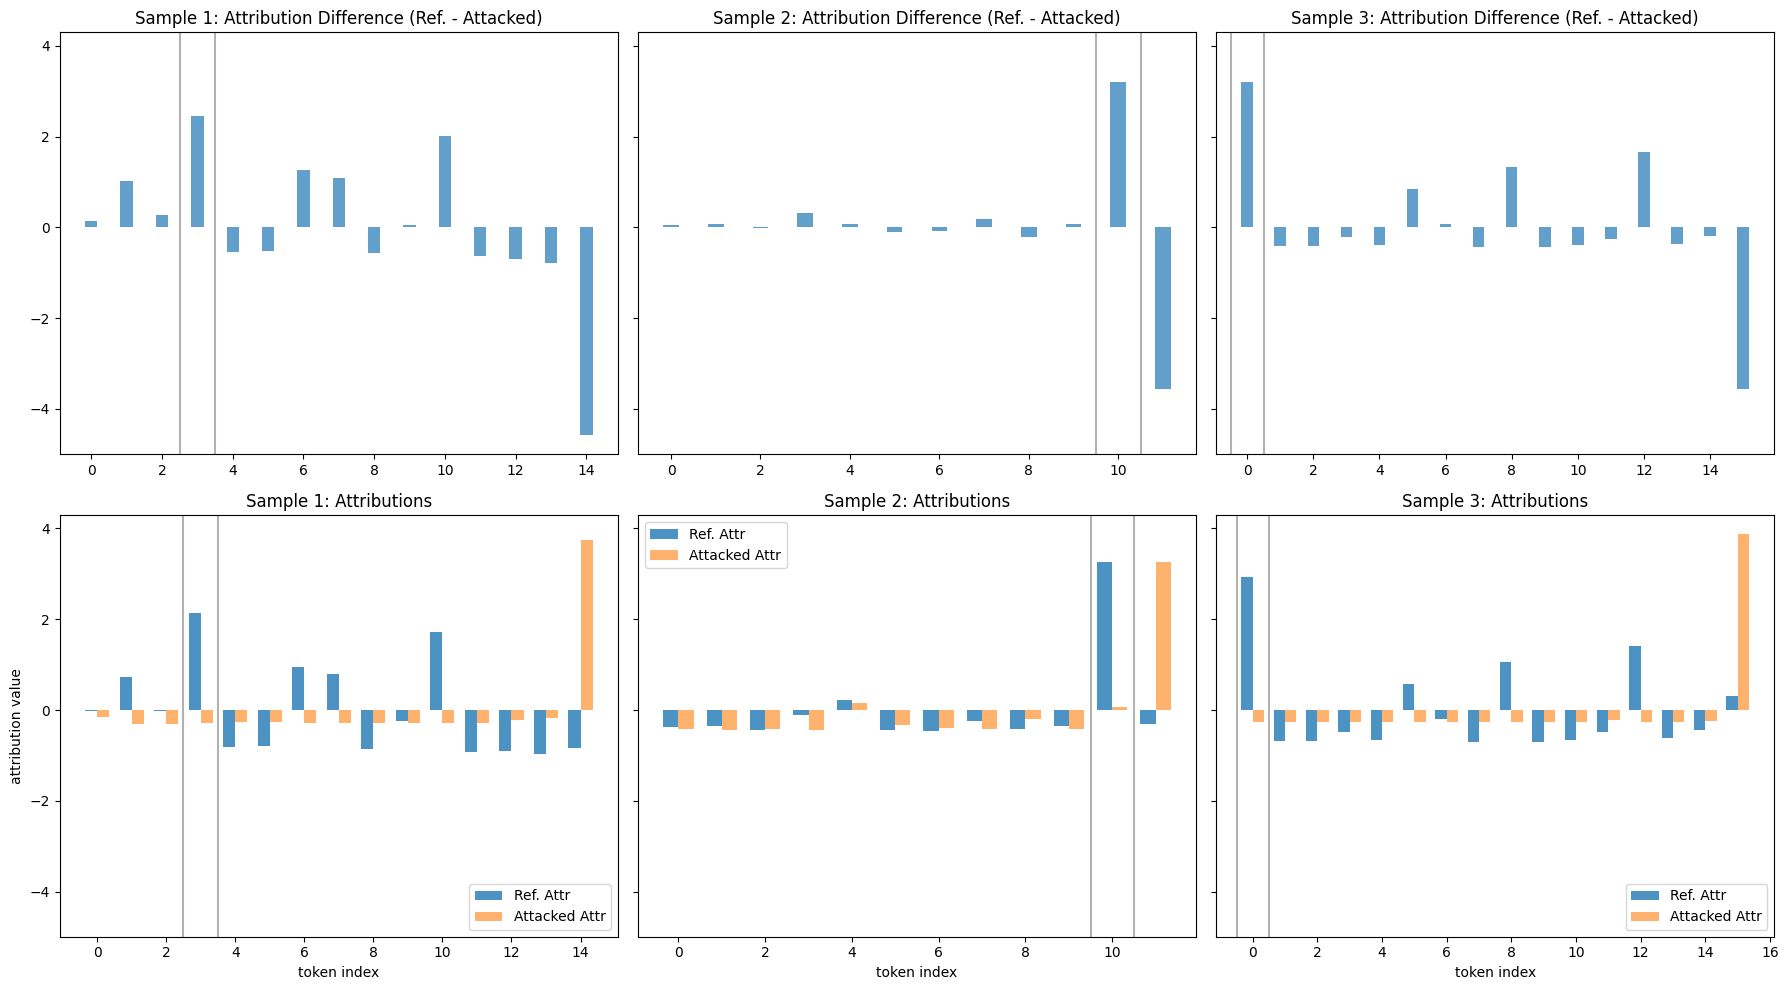

In [14]:
attr_rank = get_attr(attr_file_rank)
ref_attr = get_attr(attr_file_ref)
plot_attr_samples(attr_rank, ref_attr, n_samples=3, normalise=True, seed=1, highlight_pos='top', exclude_cls=True)

# Overall Top Tokens 

In [9]:
standard_filter = {'lr': {'$eq': 1e-5}, 
                    'optimizer': {'$eq': 'adamw'}, 
                    'lmbd': {'$eq': 0}, 
                    'scheduler_type': {'$eq':'linear'},
                    'approach': {'$eq':'tokens'}, 
                    'expl_method': {'$eq':'GAE'}} 
metrics = ['eval/accuracy', 'eval/expl_topk_loss', 'eval/rank_loss']

mappings = {
    'lmbd': r'$\lambda$',
    'eval/accuracy': 'Accuracy',
    'loss_fn': 'Attack $\\mathcal{L}$',
    'eval/expl_topk_loss': 'Top k Loss',
    'eval/rank_loss': 'Rank Loss',
    'rank_topk': 'Rank Loss',
    'topk': 'Top k Loss',
    
}

## Sweep Tables 

### Bert SST 

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_bert_sst_sweep_top_tokens', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='sst2',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.827982,0.018810,0.490246
1,0.1,topk,0.826835,0.018487,0.490144
2,1.0,rank_topk,0.817661,0.007656,0.480149
3,1.0,topk,0.823394,0.006892,0.480182
4,10.0,rank_topk,0.816514,0.000240,0.473841
5,10.0,topk,0.808486,0.000130,0.475477


In [11]:
latex_str = latex_table_maker(filtered_table, 'results/tables/topk_sst_bert.tex', mappings)
print(latex_str)

\begin{table}[h!]
\centering
{\small
\begin{tabular}{rlrrr}
\toprule
$\lambda$ & Attack $\mathcal{L}$ & Accuracy & Top k Loss & Rank Loss \\
\midrule
0.1 & Rank Loss & 0.828 & 0.019 & 0.490 \\
0.1 & Top k Loss & 0.827 & 0.018 & 0.490 \\
1 & Rank Loss & 0.818 & 0.008 & 0.480 \\
1 & Top k Loss & 0.823 & 0.007 & 0.480 \\
10 & Rank Loss & 0.817 & 0.000 & 0.474 \\
10 & Top k Loss & 0.808 & 0.000 & 0.475 \\
\bottomrule
\end{tabular}
\caption{ENTER CAPTION}
\label{tab:TableLabel}
}
\end{table}


### Bert IMDb

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_bert_imdb_sweep_top_tokens', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='custom-bert',
                 dataset='imdb',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.87248,0.007577,0.504002
1,0.1,topk,0.87256,0.007532,0.503966
2,1.0,rank_topk,0.87320,0.005577,0.502244
3,1.0,topk,0.87352,0.005404,0.502113
4,10.0,rank_topk,0.87128,0.001579,0.498860
5,10.0,topk,0.87224,0.001368,0.498717


### Albert SST 

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_albert_sst_sweep_top_tokens', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='sst2',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.862385,0.005140,0.483190
1,0.1,topk,0.853211,0.005225,0.483114
2,1.0,rank_topk,0.858945,0.004561,0.482735
3,1.0,topk,0.858945,0.005016,0.482669
4,10.0,rank_topk,0.845183,0.003870,0.481991
5,10.0,topk,0.864679,0.004284,0.481992


### Albert IMDb

In [ ]:
runs = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 sweep='GAE_albert_imdb_sweep_top_tokens', 
                 )
lmbd0 = query_wandb_runs(entity='anonuser',
                 project='xai_fooling',
                 model_name='albert/albert-base-v2',
                 dataset='imdb',
                 approach='topk',
                 extra_filters=standard_filter)

runs.extend(lmbd0)
table = make_runs_table(runs, include_metadata=False, metrics=metrics)
filtered_table = filter_table(table)
filtered_table

,lmbd,loss_fn,eval/accuracy,eval/expl_topk_loss,eval/rank_loss
0,0.1,rank_topk,0.89976,0.000143,0.498420
1,0.1,topk,0.89928,0.000194,0.498419
2,1.0,rank_topk,0.90072,0.000158,0.498425
3,1.0,topk,0.90560,0.000158,0.498414
4,10.0,rank_topk,0.90192,0.000129,0.498415
5,10.0,topk,0.90456,0.000124,0.498412


## Other Tables 

In [ ]:
vol_path = '/vol/csedu-nobackup/project/anonuser/results_attr/results/'

### Bert SST 

In [ ]:
attr_file_topk=vol_path + 'results_val_bert_sst2ue00eefl.json'
attr_file_rank=vol_path + 'results_val_bert_sst2bljl78zc.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_sst2.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_sst_bert.json'


get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=False, 
    positions_file=positions_file
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.251676,0.019457,-0.271133,10.369659
rank,-0.265159,0.020507,-0.285665,9.684368
ref,-0.081645,0.007578,-0.089223,88.353515


In [54]:
attr_file_topk=vol_path + 'results_val_bert_sst2ue00eefl_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_sst2bljl78zc_LRP.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_sst2.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_sst_bert.json'

print('LRP top token positions:')
print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file.replace('GAE_', ''),
    ignore_cls=False
))

print('GAE top token positions:')
get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file,
    ignore_cls=False
)

LRP top token positions:
      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  0.122407  -0.007952        0.130359        58.783096
rank  0.005090   0.003263        0.001828        56.796982
ref   1.161471  -0.119835        1.281306        84.383723
GAE top token positions:


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,0.893073,-0.063341,0.956414,80.866498
rank,0.840380,-0.060939,0.901319,79.904462
ref,0.846276,-0.061022,0.907297,78.377605


### Bert IMDb 

In [51]:
attr_file_topk=vol_path + 'results_val_bert_imdbledlnsx5.json'
attr_file_rank=vol_path + 'results_val_bert_imdb5idgazm9.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_imdb_bert.json'


get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=False, 
    positions_file=positions_file
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.042767,0.001474,-0.044241,32.979476
rank,-0.036672,0.001332,-0.038004,36.018240
ref,0.144344,-0.002219,0.146563,91.579772


In [55]:
attr_file_topk=vol_path + 'results_val_bert_imdbledlnsx5_LRP.json'
attr_file_rank=vol_path + 'results_val_bert_imdb5idgazm9_LRP.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_bert_imdb.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_imdb_bert.json'

print('LRP top token positions & LRP baseline network:')
print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file.replace('GAE_', ''),
    ignore_cls=False

))

print('GAE top token positions & LRP baseline network:')
get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file,
    ignore_cls=False
)

LRP top token positions & LRP baseline network:
      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk -0.457140  -0.008573       -0.448567        77.536611
rank -0.431514  -0.008276       -0.423239        77.168935
ref   1.314968  -0.048585        1.363552        88.354382
GAE top token positions & LRP baseline network:


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,0.654751,-0.011892,0.666643,74.960053
rank,0.693436,-0.012629,0.706065,74.856067
ref,2.881766,-0.053435,2.935201,94.453777


### Albert SST 

In [52]:
attr_file_topk=vol_path + 'results_val_albert_sst2fhj10kta.json'
attr_file_rank=vol_path + 'results_val_albert_sst26xwakj2b.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_sst_albert.json'


get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=False, 
    positions_file=positions_file
)

,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.205314,0.016088,-0.221402,75.466892
rank,-0.205340,0.016077,-0.221417,76.660051
ref,-0.196425,0.015530,-0.211955,90.889006


In [57]:
attr_file_topk=vol_path + 'results_val_albert_sst2fhj10kta_LRP.json'
attr_file_rank=vol_path + 'results_val_albert_sst26xwakj2b_LRP.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_sst2.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_sst_albert.json'

print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file.replace('GAE_', ''),
    ignore_cls=False

))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file,
    ignore_cls=False
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  0.252814  -0.083991        0.336805        58.731466
rank  0.469746  -0.100480        0.570226        60.031622
ref   0.621828  -0.101012        0.722839        62.321608


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.248309,0.006455,-0.254764,49.692142
rank,-0.020667,-0.000587,-0.020080,52.077040
ref,0.263154,-0.010481,0.273635,58.517527


### Albert IMDb

In [53]:
attr_file_topk=vol_path + 'results_val_albert_imdbps7b38i0.json'
attr_file_rank=vol_path + 'results_val_albert_imdbxy97rewh.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_imdb_albert.json'


get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref,
    ignore_cls=False, 
    positions_file=positions_file
)



,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,-0.066661,0.001450,-0.068111,59.109549
rank,-0.066643,0.001450,-0.068094,53.634354
ref,-0.065951,0.001442,-0.067393,62.664735


In [56]:
attr_file_topk=vol_path + 'results_val_albert_imdbps7b38i0_LRP.json'
attr_file_rank=vol_path + 'results_val_albert_imdbxy97rewh_LRP.json' 
attr_file_ref= 'data/GAE_attr/results_og_val_albert_imdb.json'
positions_file='data/tokens_position_masks/GAE_top_tokens_imdb_albert.json'

print(get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file.replace('GAE_', ''),
    ignore_cls=False

))

get_table_topk(
    attr_file_topk=attr_file_topk,
    attr_file_rank=attr_file_rank,
    attr_file_ref=attr_file_ref.replace('GAE_attr/', ''),
    positions_file=positions_file,
    ignore_cls=False
)

      top_mean  mean_rest  diff_mean_rest  percentile_rank
topk  2.665530  -0.049912        2.715442        66.914396
rank  1.995269  -0.044914        2.040183        65.179961
ref   1.623422  -0.027260        1.650682        68.350065


,top_mean,mean_rest,diff_mean_rest,percentile_rank
topk,0.805146,-0.017374,0.822520,62.257224
rank,-0.249796,-0.013837,-0.235959,61.784377
ref,-1.203807,0.009855,-1.213662,54.737892


## Plotting 

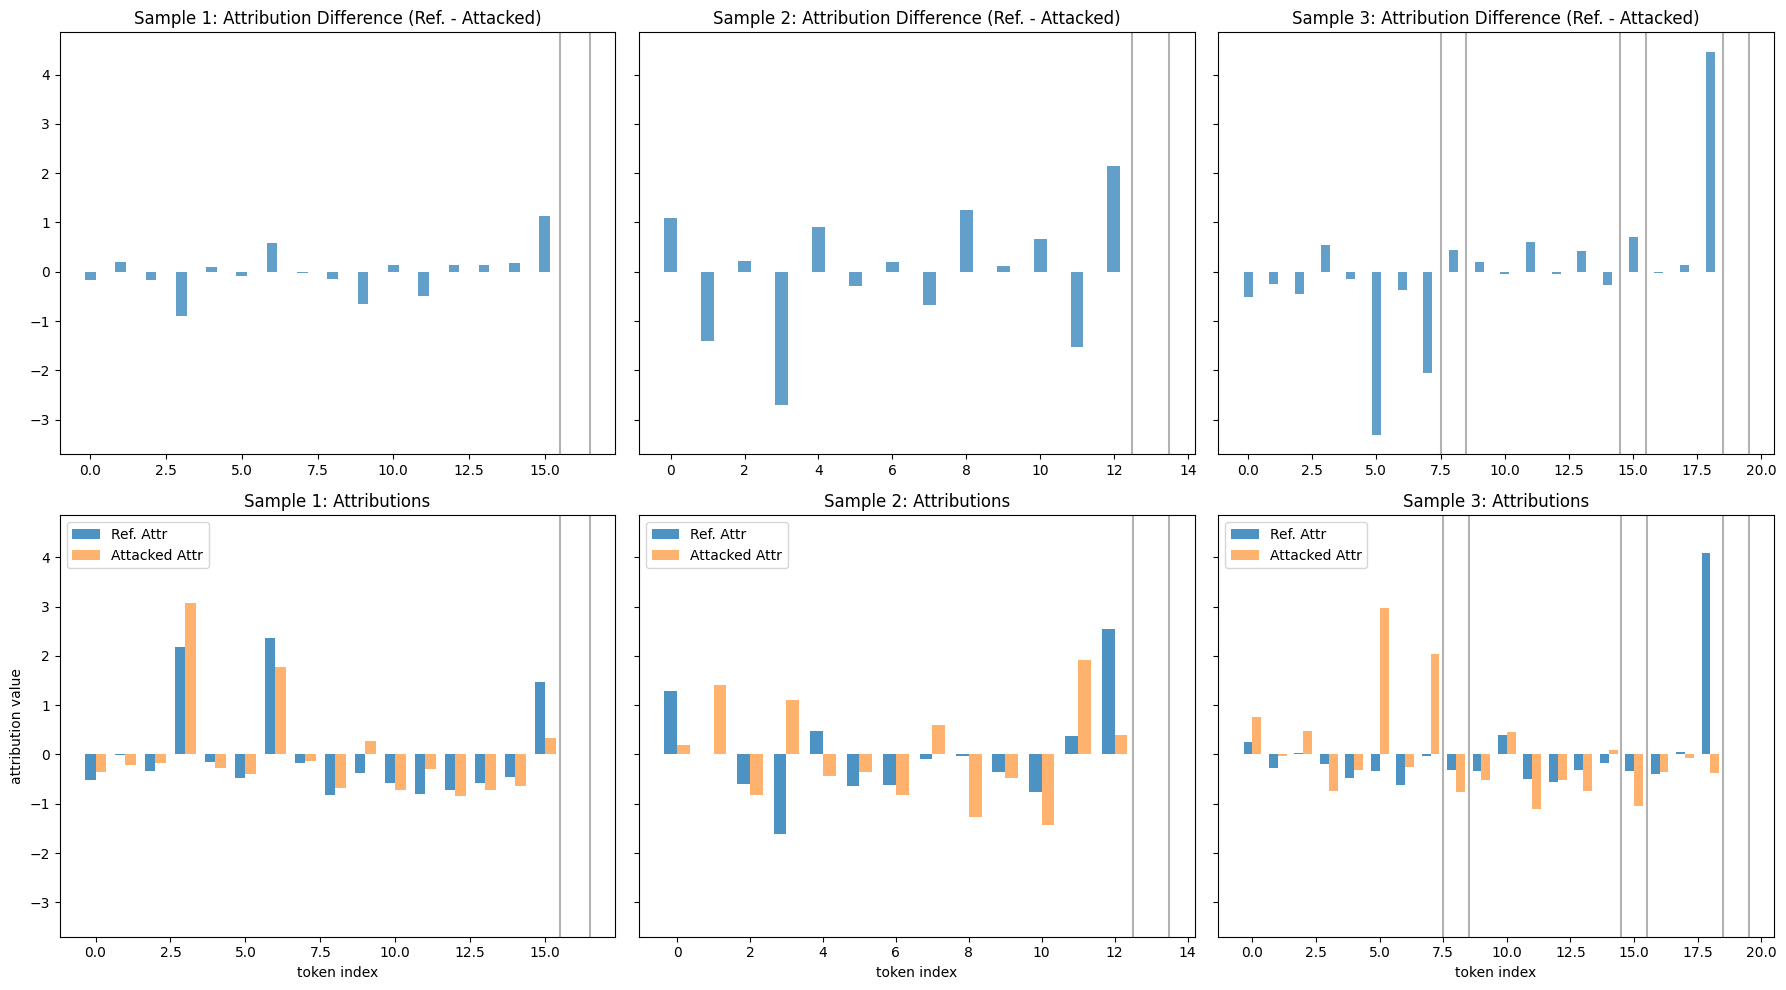

In [ ]:
# for albert sst to see why its so bad 
attr_rank = get_attr(attr_file_rank)
ref_attr = get_attr(attr_file_ref)
positions = get_positions(positions_file)
plot_attr_samples(attr_rank, ref_attr, n_samples=3, normalise=True, seed=1, 
                    highlight_pos='mask', mask_positions=positions, exclude_cls=True)